In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

df = pd.read_csv(r"C:\Users\m\Taha\Codebasics Challenges\Parliament Elections\LOK SABHA.csv")

In [2]:
df.head()

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,Year,candidate_rank,pc_votes,pc_electors,state_votes,state_electors,party_votes,party_rank
0,Andhra Pradesh,Adilabad,Godam Nagesh,Male,49,ST,TRS,Car,425762,5085,430847,1386282,2014,1,1045839,12476538,48367188,1028145613,430847,1
1,Andhra Pradesh,Adilabad,Naresh,Male,37,ST,INC,Hand,257994,1563,259557,1386282,2014,2,1045839,12476538,48367188,1028145613,259557,2
2,Andhra Pradesh,Adilabad,Ramesh Rathod,Male,48,ST,TDP,Bicycle,182879,1319,184198,1386282,2014,3,1045839,12476538,48367188,1028145613,184198,3
3,Andhra Pradesh,Adilabad,Rathod Sadashiv,Male,55,ST,BSP,Elephant,94363,57,94420,1386282,2014,4,1045839,12476538,48367188,1028145613,94420,4
4,Andhra Pradesh,Adilabad,Nethawath Ramdas,Male,44,ST,IND,Auto- Rickshaw,41028,4,41032,1386282,2014,5,1045839,12476538,48367188,1028145613,59733,5


In [3]:
winners_parties = df[df['candidate_rank'] == 1]

In [4]:
query = """
select 
    party,
    Year,
    count(*) as seats
from
    winners_parties
group by
    party, Year
order by
    seats desc
"""
seats = sqldf(query)
seats

,party,Year,seats
0,BJP,2019,301
1,BJP,2014,268
2,INC,2019,52
3,INC,2014,43
4,ADMK,2014,37
...,...,...,...
67,RSP,2019,1
68,SDF,2014,1
69,SKM,2019,1
70,SWP,2014,1


In [50]:
seats_grouped = seats.groupby(['party','Year'])['seats'].sum().unstack().sort_values(by=[2019, 2014], ascending=False)

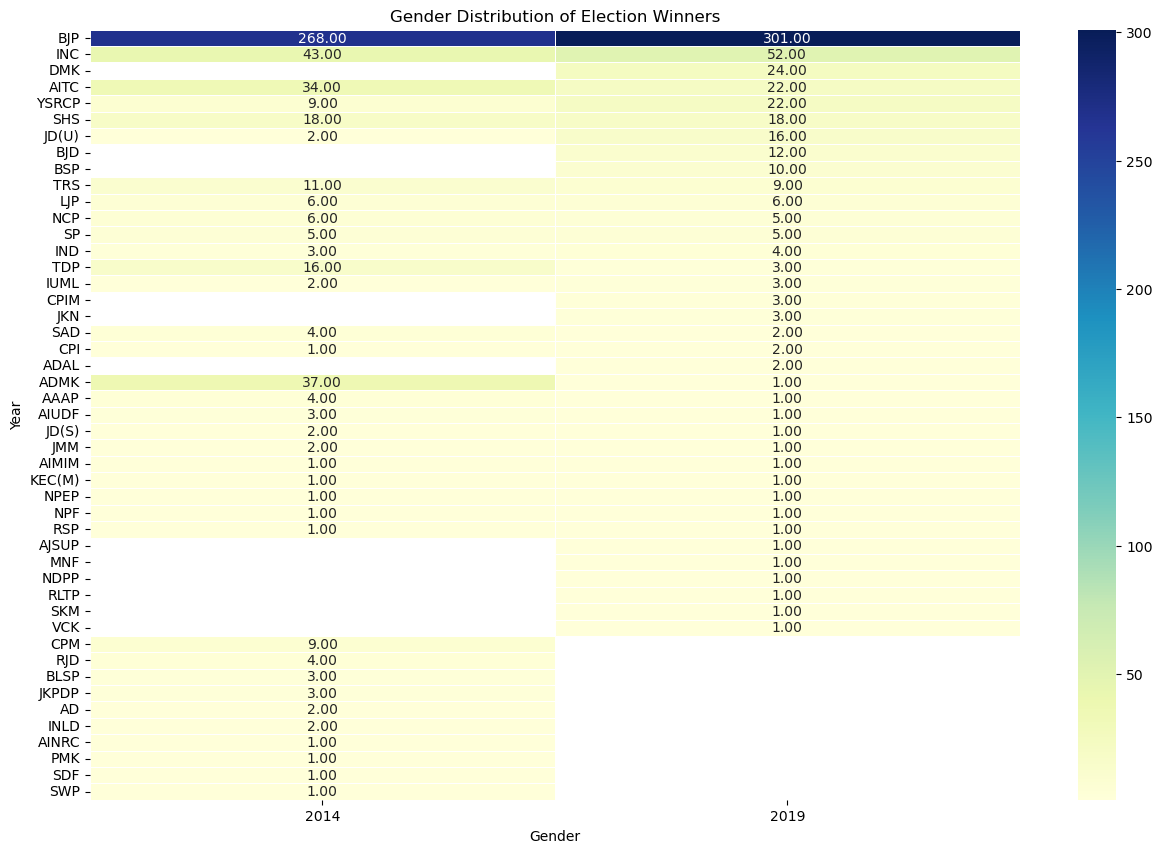

In [59]:
from matplotlib.colors import LinearSegmentedColormap

custom_cmap = LinearSegmentedColormap.from_list("OrBu", ['#FF8C00', '#1f77b4'])
# ['#FF8C00', '#1f77b4']
# Set the plot size
plt.figure(figsize=(15, 10))

# Create a heatmap with the custom colormap
sns.heatmap(seats_grouped, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=.5)

# Customize the plot
plt.title('Gender Distribution of Election Winners')
plt.ylabel('Year')
plt.xlabel('Gender')

# Display the plot
plt.show()


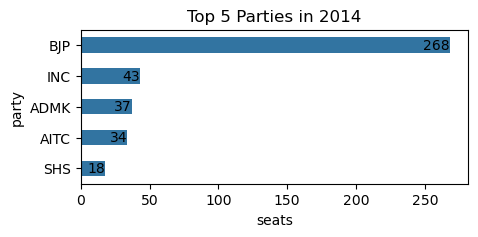

In [5]:
plt.figure(figsize = (5, 2))
sns.barplot(data = seats[seats['Year'] == 2014].head(5),
            y = 'party', x= 'seats', color = '#1f77b4', width = .5)
for index, value in enumerate(seats[seats['Year'] == 2014]['seats'].head(5)):
    plt.text(value, index, f'{value}', color='black', ha="right", va="center")
plt.title('Top 5 Parties in 2014')
plt.show()

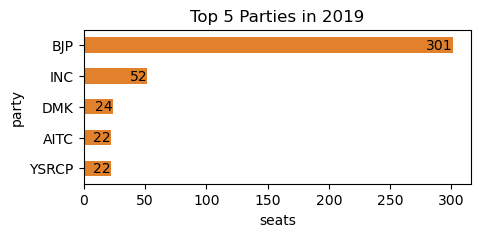

In [6]:
plt.figure(figsize = (5, 2))
sns.barplot(data = seats[seats['Year'] == 2019].head(5),
            y = 'party', x= 'seats', color = '#ff7f0e', width = .5)
for index, value in enumerate(seats[seats['Year'] == 2019]['seats'].head(5)):
    plt.text(value, index, f'{value}', color='black', ha="right", va="center")
plt.title('Top 5 Parties in 2019')
plt.show()

In [7]:
query = """
select 
    party,
    Year,
    count(distinct candidate) as members
from
    df
group by
    party, Year
order by
    members desc
"""
members = sqldf(query)
members

,party,Year,members
0,IND,2019,3403
1,IND,2014,3026
2,BSP,2014,469
3,BJP,2019,436
4,INC,2014,431
...,...,...,...
1122,VOP,2014,1
1123,VSP,2014,1
1124,WAP,2019,1
1125,YSRPP,2019,1


In [8]:
test = pd.merge(seats, members , on = ['party', 'Year'])
test.sort_values(by = 'members', ascending = False).head(10)

,party,Year,seats,members
26,IND,2019,4,3403
32,IND,2014,3,3026
0,BJP,2019,301,436
3,INC,2014,43,431
2,INC,2019,52,420
25,AAAP,2014,4,402
1,BJP,2014,268,393
15,BSP,2019,10,383
23,SP,2014,5,188
5,AITC,2014,34,123


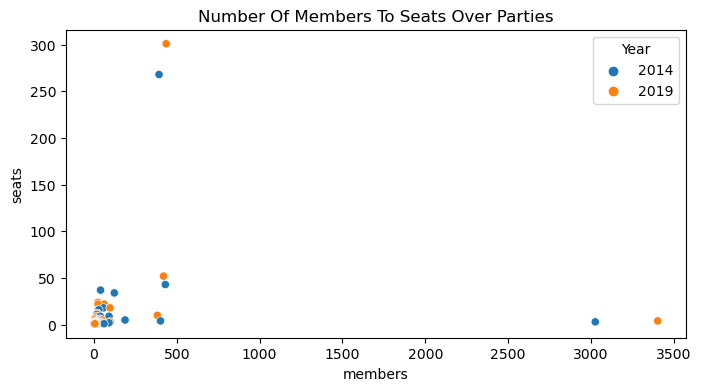

In [9]:
plt.figure(figsize = (8,4))
sns.scatterplot(data = test, x = 'members', y = 'seats', hue = 'Year', palette=['#1f77b4', '#ff7f0e'] )
plt.title('Number Of Members To Seats Over Parties')
plt.show()

## 6. % split of votes of parties between 14 vs 19 at national level

In [10]:
query = """
select
    *,
    sum(case when Year = 2019 then vote_share_perc else 0 end) over(partition by pc_name, party) - 
    sum(case when Year = 2014 then vote_share_perc else 0 end) over(partition by pc_name, party) as vote_diff 
from
(select 
    pc_name,
    pc_votes,
    party,
    party_votes,
    Year,
    round((party_Votes/cast(pc_votes as real)) * 100,2) as vote_share_perc
from
    winners_parties) as sub
order by 
    vote_share_perc desc 

"""
national_split = sqldf(query)
national_split

,pc_name,pc_votes,party,party_votes,Year,vote_share_perc,vote_diff
0,Kokrajhar,1223869,IND,944390,2014,77.16,-43.01
1,Surat,947922,BJP,718412,2014,75.79,-1.32
2,Surat,1068412,BJP,795651,2019,74.47,-1.32
3,Navsari,1308018,BJP,972739,2019,74.37,3.65
4,Vadodara,1161577,BJP,845464,2014,72.79,-0.49
...,...,...,...,...,...,...,...
1043,Raiganj,1108193,CPM,317515,2014,28.65,-28.65
1044,Mahabubabad,1124372,TRS,320569,2014,28.51,18.47
1045,Ludhiana,1100457,INC,300459,2014,27.30,9.36
1046,Ladakh,118029,BJP,31111,2014,26.36,7.58


In [11]:
national_split['pc & party'] = national_split['pc_name'] + " - " + national_split['party']

In [12]:
top_10_2014 = national_split[national_split['Year'] == 2014].head(10)
top_10_2019 = national_split[national_split['Year'] == 2019].head(10)

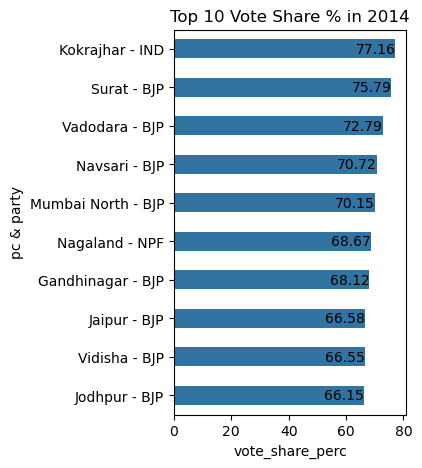

In [13]:
plt.figure(figsize = (3,5))
sns.barplot(data = top_10_2014, y = 'pc & party', x = 'vote_share_perc',
            color = '#1f77b4', width = .5 )
for index, value in enumerate(top_10_2014['vote_share_perc']):
    plt.text(value, index, f'{value}', color='black', ha="right", va="center")
plt.title('Top 10 Vote Share % in 2014')
plt.show()

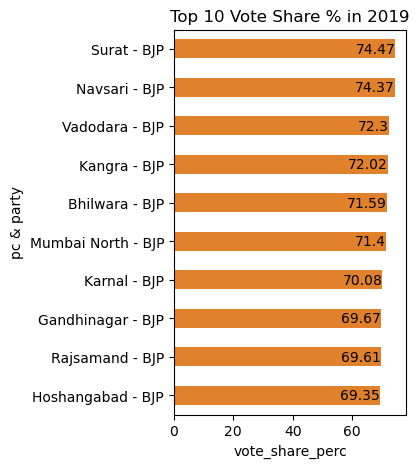

In [14]:
plt.figure(figsize = (3,5))
sns.barplot(data = top_10_2019, y = 'pc & party', x = 'vote_share_perc',
            color = '#ff7f0e', width = .5 )
for index, value in enumerate(top_10_2019['vote_share_perc']):
    plt.text(value, index, f'{value}', color='black', ha="right", va="center")
plt.title('Top 10 Vote Share % in 2019')
plt.show()

In [15]:
condition = ((national_split['vote_share_perc'] != - national_split['vote_diff']) & (national_split['vote_share_perc'] != national_split['vote_diff']))
df_condition = national_split[condition][['pc & party', 'vote_diff']].drop_duplicates()
df_condition

,pc & party,vote_diff
0,Kokrajhar - IND,-43.01
1,Surat - BJP,-1.32
3,Navsari - BJP,3.65
4,Vadodara - BJP,-0.49
6,Kangra - BJP,14.96
...,...,...
936,Kaushambi - BJP,2.87
960,Jalandhar - INC,1.29
979,Ludhiana - INC,9.36
1006,Maldaha Dakshin - INC,-0.08


In [16]:
top_10_positive = df_condition.sort_values(by = 'vote_diff', ascending = False).head(5)
top_10_negative = df_condition.sort_values(by = 'vote_diff', ascending = True).head(5)

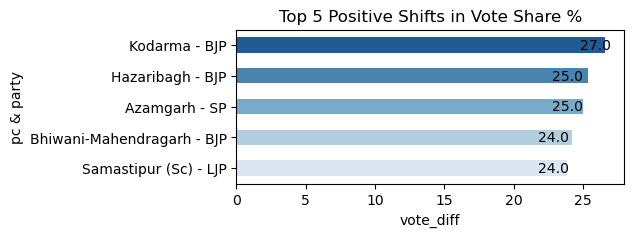

In [41]:
plt.figure(figsize = (5,2))
sns.barplot(data = top_10_positive, y = 'pc & party', x = 'vote_diff',
            palette = 'Blues_r', width = .5 )
for index, value in enumerate(top_10_positive['vote_diff'].round()):
    plt.text(value, index, f'{value}', color='black', ha="right", va="center")
plt.title('Top 5 Positive Shifts in Vote Share %')
plt.show()

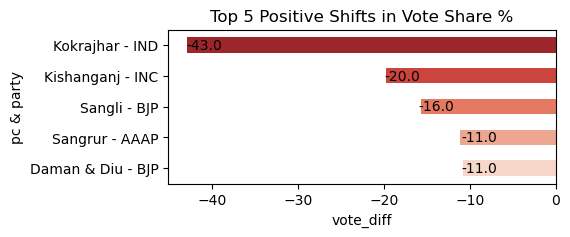

In [40]:
plt.figure(figsize = (5,2))
sns.barplot(data = top_10_negative, y = 'pc & party', x = 'vote_diff',
            palette = 'Reds_r', width = .5 )
for index, value in enumerate(top_10_negative['vote_diff'].round()):
    plt.text(value, index, f'{value}', color='black', ha="left", va="center")
plt.title('Top 5 Positive Shifts in Vote Share %')
plt.show()

## 6. % split of votes of parties between 14 vs 19 at state level

In [29]:
query = """
select
    *,
    sum(case when Year = 2019 then party_votes_perc else 0 end) over(partition by state, party) - 
    sum(case when Year = 2014 then party_votes_perc else 0 end) over(partition by state, party) as vote_diff
from
(
select
    *,
    round((party_state_votes/ cast(state_votes as real)) * 100, 2) as party_votes_perc
from
(select
    state,
    state_votes,
    Year,
    party,
    sum(party_votes) as party_state_votes
from
    winners_parties
group by
    state, state_votes, Year, Party
                                        ) as sub
order by
    party_votes_perc desc                
                                        ) as sub1
"""
state_level = sqldf(query)
state_level

,state,state_votes,Year,party,party_state_votes,party_votes_perc,vote_diff
0,Andaman & Nicobar Islands,190328,2014,BJP,90969,47.80,-47.80
1,Andaman & Nicobar Islands,207296,2019,INC,95308,45.98,45.98
2,Andhra Pradesh,48367188,2014,AIMIM,513868,1.06,-1.06
3,Andhra Pradesh,48367188,2014,BJP,1545409,3.20,-3.20
4,Andhra Pradesh,48367188,2014,INC,892168,1.84,-1.84
...,...,...,...,...,...,...,...
156,West Bengal,57206976,2019,BJP,11712635,20.47,18.71
157,West Bengal,51631828,2014,BJP,908240,1.76,18.71
158,West Bengal,51631828,2014,CPM,744462,1.44,-1.44
159,West Bengal,51631828,2014,INC,1730650,3.35,-1.54


In [30]:
state_level['state & party'] = state_level['state'] + ' - ' + state_level['party']

In [35]:
top_10_2014_state = state_level[state_level['Year'] == 2014].sort_values(by = 'party_votes_perc', ascending = False).head(10)
top_10_2019_state = state_level[state_level['Year'] == 2019].sort_values(by = 'party_votes_perc', ascending = False).head(10)

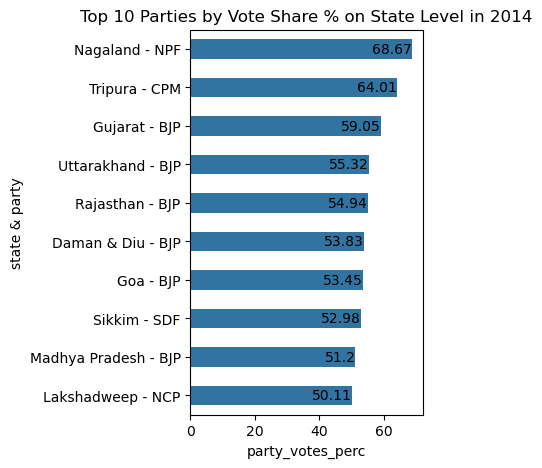

In [36]:
plt.figure(figsize = (3,5))
sns.barplot(data = top_10_2014_state, y = 'state & party', x = 'party_votes_perc',
            color = '#1f77b4', width = .5 )
for index, value in enumerate(top_10_2014_state['party_votes_perc']):
    plt.text(value, index, f'{value}', color='black', ha="right", va="center")
plt.title('Top 10 Parties by Vote Share % on State Level in 2014')
plt.show()

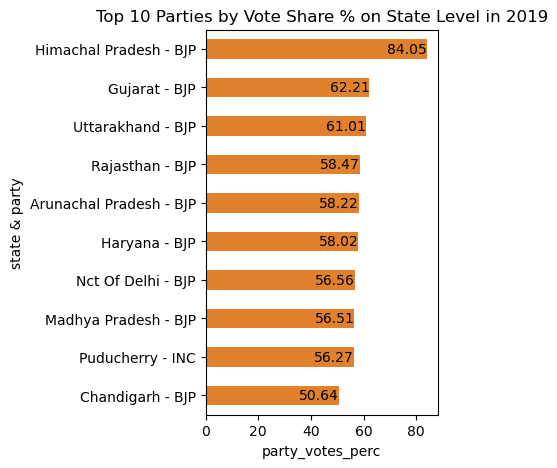

In [38]:
plt.figure(figsize = (3,5))
sns.barplot(data = top_10_2019_state, y = 'state & party', x = 'party_votes_perc',
            color = '#ff7f0e', width = .5 )
for index, value in enumerate(top_10_2019_state['party_votes_perc']):
    plt.text(value, index, f'{value}', color='black', ha="right", va="center")
plt.title('Top 10 Parties by Vote Share % on State Level in 2019')
plt.show()

In [24]:
condition = ((state_level['party_votes_perc'] != - state_level['vote_diff']) & (state_level['party_votes_perc'] != state_level['vote_diff']))
df_condition_state = state_level[condition][['state & party', 'vote_diff']].drop_duplicates()
df_condition_state

,state & party,vote_diff
5,Andhra Pradesh - TDP,-14.00
8,Andhra Pradesh - YSRCP,33.60
10,Arunachal Pradesh - BJP,29.85
13,Assam - AIUDF,-4.95
15,Assam - BJP,7.14
17,Assam - INC,5.49
19,Assam - IND,-3.45
21,Bihar - BJP,1.05
24,Bihar - INC,-1.40
26,Bihar - JD(U),18.94


In [25]:
top_5_positive_state = df_condition_state.sort_values(by = 'vote_diff', ascending = False).head(5)
top_5_negative_state = df_condition_state.sort_values(by = 'vote_diff', ascending = True).head(5)

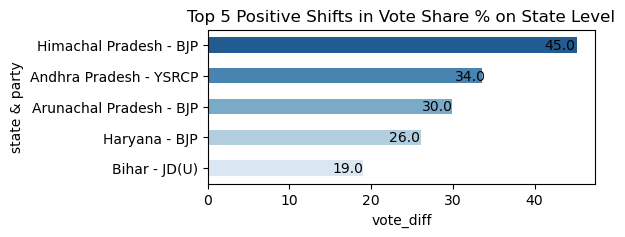

In [42]:
plt.figure(figsize = (5,2))
sns.barplot(data = top_5_positive_state, y = 'state & party', x = 'vote_diff',
            palette = 'Blues_r', width = .5 )
for index, value in enumerate(top_5_positive_state['vote_diff'].round()):
    plt.text(value, index, f'{value}', color='black', ha="right", va="center")
plt.title('Top 5 Positive Shifts in Vote Share % on State Level')
plt.show()

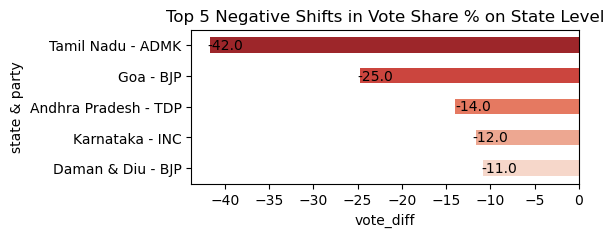

In [43]:
plt.figure(figsize = (5,2))
sns.barplot(data = top_5_negative_state, y = 'state & party', x = 'vote_diff',
            palette = 'Reds_r', width = .5 )
for index, value in enumerate(top_5_negative_state['vote_diff'].round()):
    plt.text(value, index, f'{value}', color='black', ha="left", va="center")
plt.title('Top 5 Negative Shifts in Vote Share % on State Level')
plt.show()